In [12]:
import cv2
from torch.utils.data import DataLoader
import os
from celeba import CelebADataset
import yaml
import baseline_architecture
import wandb
import torch
import numpy as np

# Inspecting the training dataset

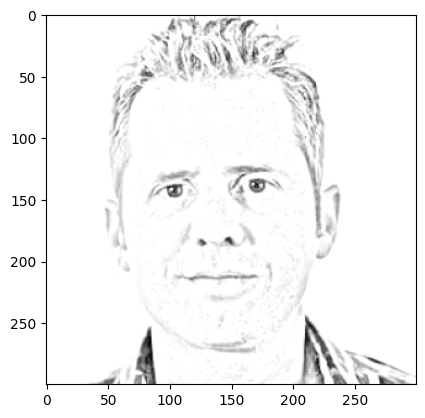

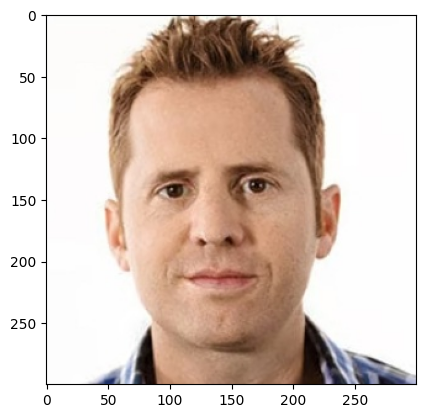

In [2]:
from matplotlib import pyplot as plt

source_image_set = 'model_input/sketches'
target_image_set = 'model_input/originals'

sample_source_image = cv2.imread(os.path.join(source_image_set, '1.jpg'), cv2.IMREAD_GRAYSCALE) # Grayscale because the images are black and white sketches
sample_target_image = cv2.cvtColor(cv2.imread(os.path.join(target_image_set, '1.jpg')), cv2.COLOR_RGB2BGR) # Images are RGB, but OpenCV reads them as BGR, so we convert them back to RGB

plt.imshow(sample_source_image, cmap='gray')
plt.show()
plt.imshow(sample_target_image)
plt.show()

# Instantiating the dataloader

In [3]:
BATCH_SIZE = 8
CONFIG = yaml.safe_load(open('config.yaml', 'r'))

dataset = CelebADataset(CONFIG)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# Instantiating and training the model

In [ ]:
model = baseline_architecture.AutoEncoder(CONFIG)
model.dataset = dataset
model.dataloader = dataloader
wandb_config = CONFIG['wandb_config']
sweep_config = CONFIG['sweep_config']
project_name = wandb_config['project_name']
sweep_id = wandb.sweep(sweep_config, project=project_name)
model = baseline_architecture.AutoEncoder(CONFIG)
wandb.agent(sweep_id, model.train, count=1)
wandb.finish()

# Inference

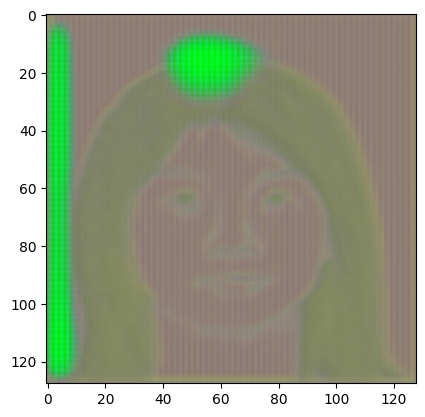

In [15]:
test_image = cv2.imread('generation_input/CUHK_sketches/F2-005-01-sz1.jpg', cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (128, 128))
test_image = torch.tensor(test_image).unsqueeze(0).unsqueeze(0).float()
generated_image = model(test_image, None)
generated_image = generated_image.squeeze(0).squeeze(0).detach().numpy()
generated_image = np.transpose(generated_image, (1, 2, 0))
generated_image = cv2.cvtColor(generated_image, cv2.COLOR_BGR2RGB)
plt.imshow(generated_image)